*Téléchargement du Dataset et Compréhension des Caractéristiques*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from scipy import stats
from imblearn.over_sampling import SMOTE
# Fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Encodage binaire (0 et 1) pour les colonnes booléennes
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'Male': 0, 'Female': 1, 'yes': 1, 'no': 0}
for col in binary_columns:
    X.loc[:, col] = X[col].map(binary_mapping)

# Encodage ordinal pour certaines colonnes
ordinal_columns = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'NObeyesdad': {
        'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
        'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6
    }
}
for col, mapping in ordinal_columns.items():
    if col in X.columns:
        X.loc[:, col] = X[col].map(mapping)
    elif col in y.columns:
        y.loc[:, col] = y[col].map(mapping)
sfsffs
# Vérification de l'existence de la colonne MTRANS avant transformation
if 'MTRANS' in X.columns:
    # One-Hot Encoding manuel pour les variables nominales (MTRANS)
    transport_modes = ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
    for mode in transport_modes[1:]:  # Exclure la première catégorie pour éviter le dummy variable trap
        X.loc[:, f'MTRANS_{mode}'] = (X['MTRANS'] == mode).astype(int)
    X.drop(columns=['MTRANS'], inplace=True)
else:
    print("La colonne 'MTRANS' n'existe pas dans X. Vérifiez les données.")

# Sauvegarder les données transformées au format CSV
X.to_csv("X_transformed.csv", index=False)
y.to_csv("y_transformed.csv", index=False)

# Fusionner X et y en un seul tableau
full_data = pd.concat([X, y], axis=1)

# Sauvegarder les données transformées au format CSV
full_data.to_csv("full_data_transformed.csv", index=False)

# Afficher les 5 premières lignes après transformation
print(full_data.head())

# Afficher les 5 premières lignes après transformation
print(X.head())
print(y.head())

  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0      1  21.0    1.62    64.0                              1    0   2.0  3.0   
1      1  21.0    1.52    56.0                              1    0   3.0  3.0   
2      0  23.0    1.80    77.0                              1    0   2.0  3.0   
3      0  27.0    1.80    87.0                              0    0   3.0  3.0   
4      0  22.0    1.78    89.8                              0    0   2.0  1.0   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC  MTRANS_Walking  MTRANS_Automobile  \
0    1     0   2.0   0  0.0  1.0    0               0                  0   
1    1     1   3.0   1  3.0  0.0    1               0                  0   
2    1     0   2.0   0  2.0  1.0    2               0                  0   
3    1     0   2.0   0  2.0  0.0    2               1                  0   
4    1     0   2.0   0  0.0  0.0    1               0                  0   

   MTRANS_Motorbike  MTRANS_Bike NObeyesdad  
0         

*Identification des Valeurs Manquantes et des Outliers*

In [21]:
# Vérification des valeurs manquantes
missing_values = X.isnull().sum()
missing_percentage = (missing_values / len(X)) * 100
print(missing_percentage)


Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS_Walking                    0.0
MTRANS_Automobile                 0.0
MTRANS_Motorbike                  0.0
MTRANS_Bike                       0.0
dtype: float64


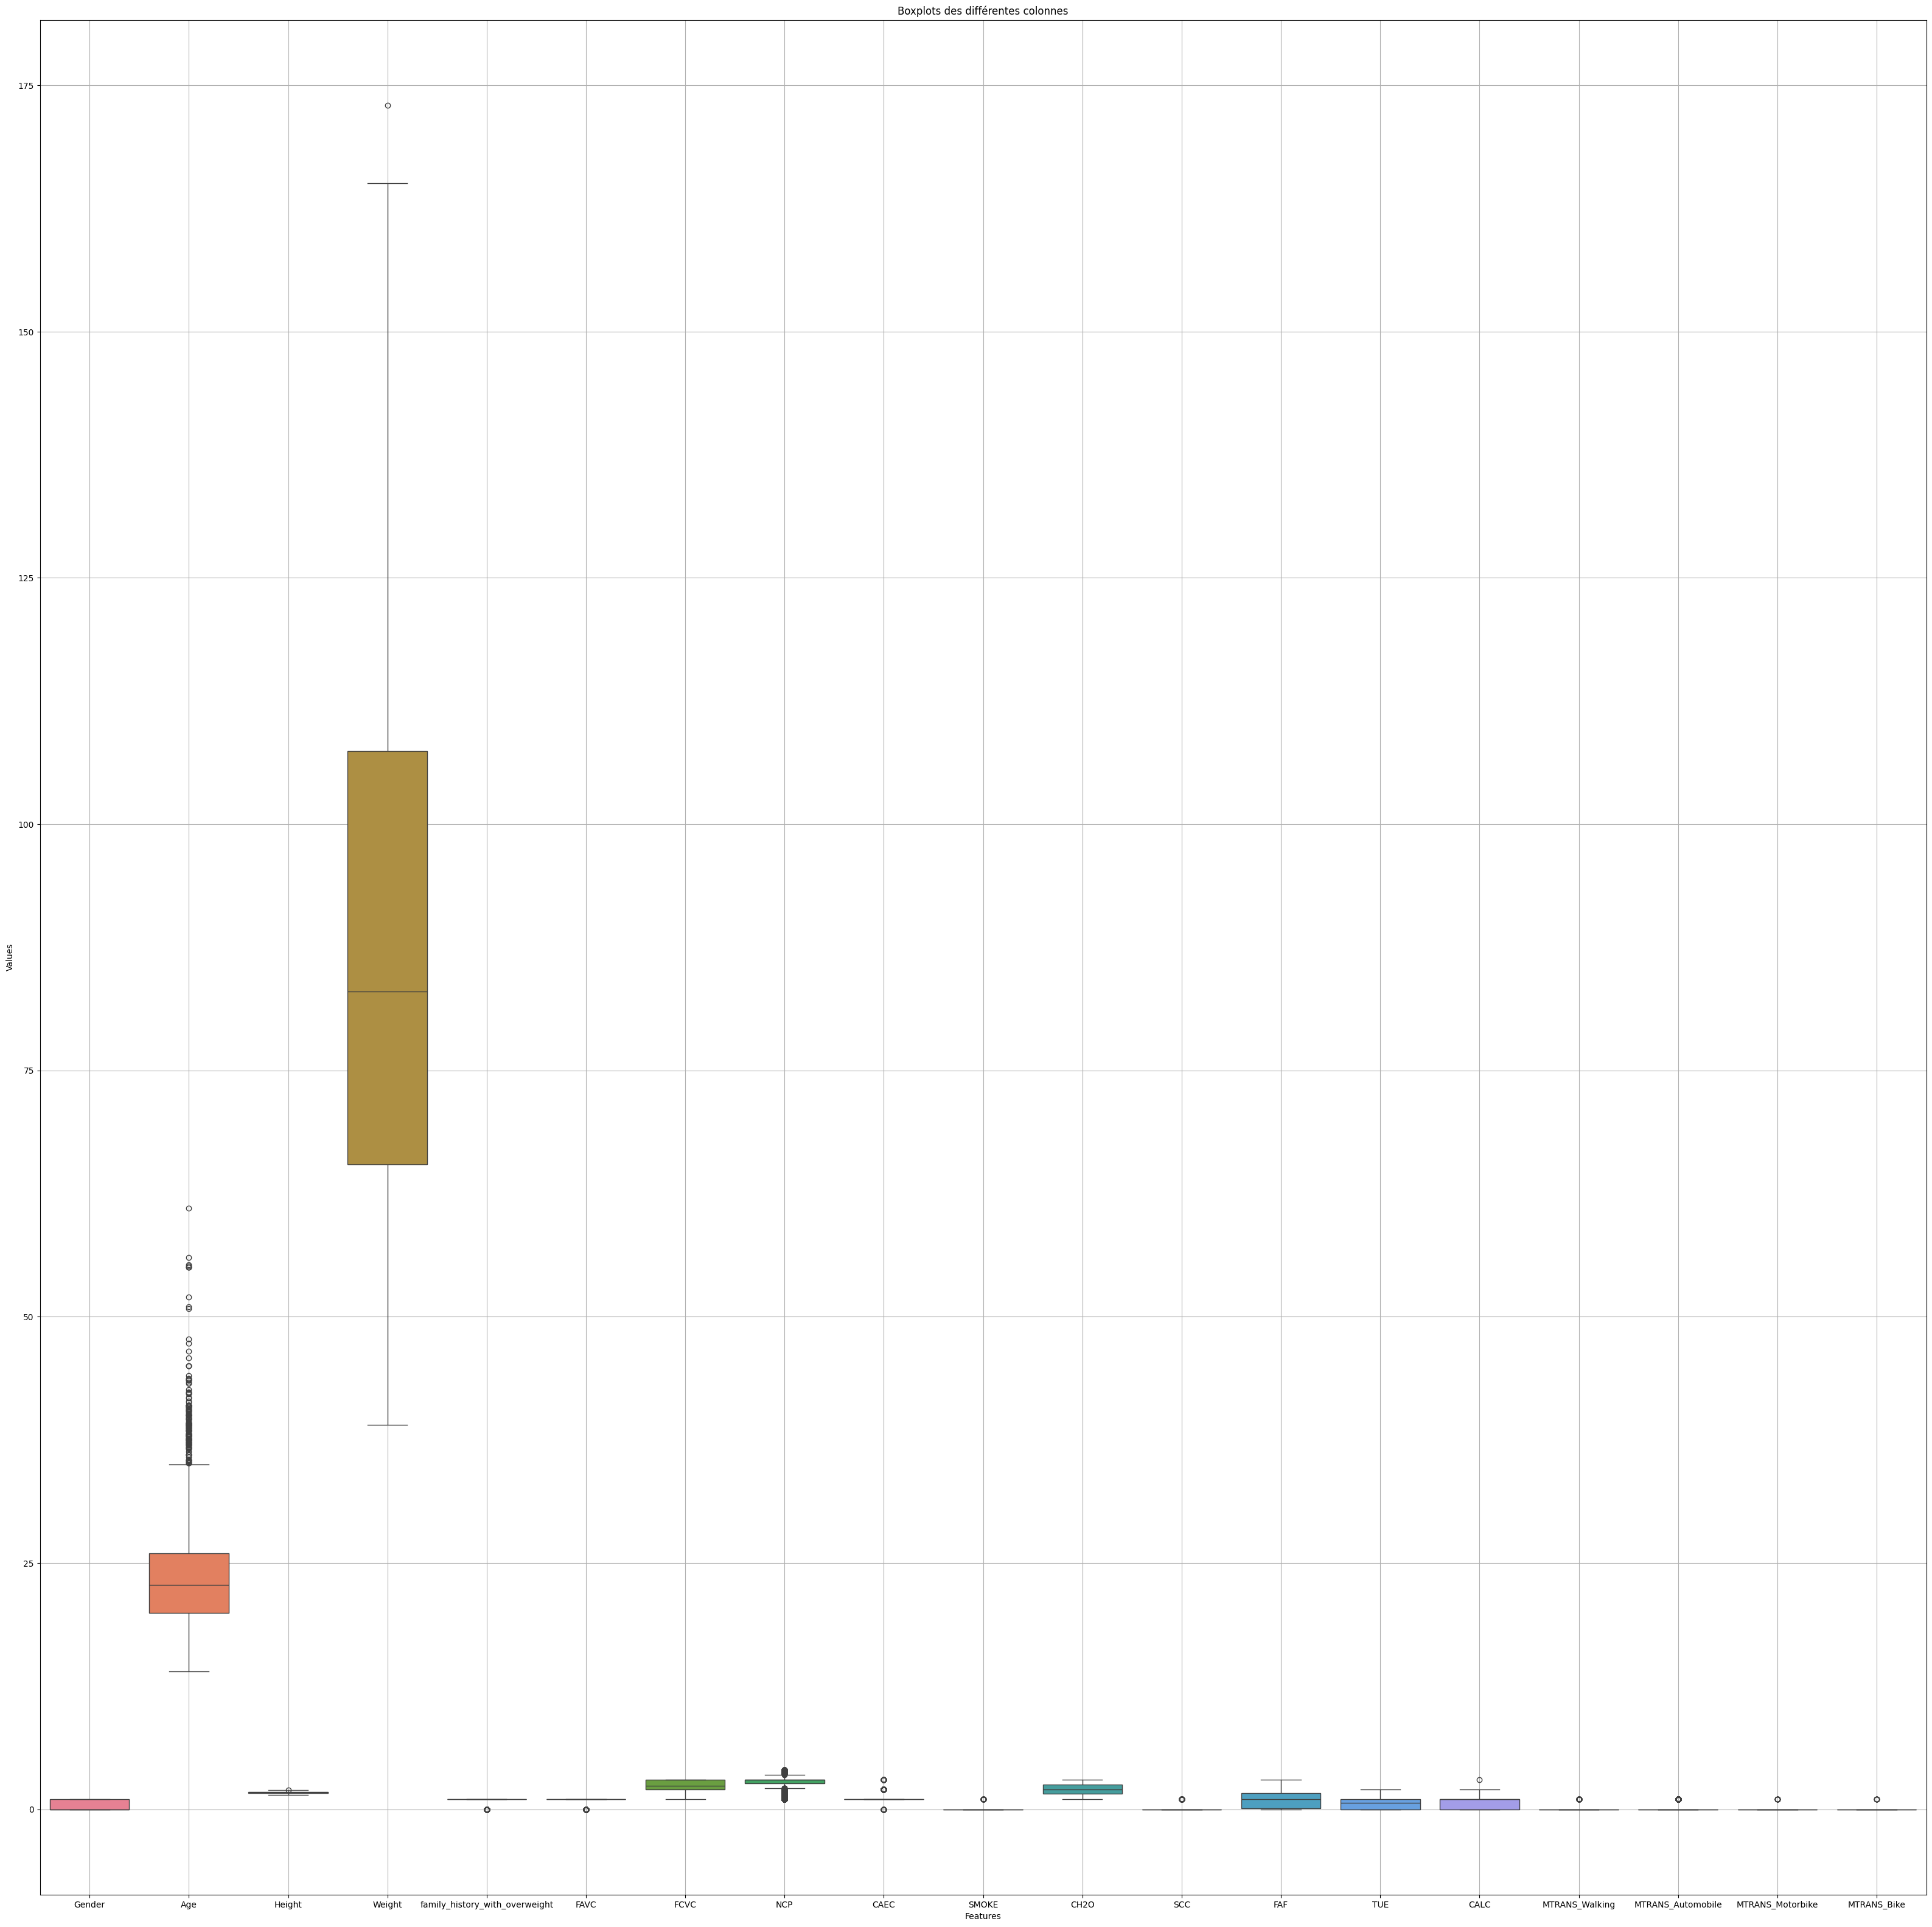

In [ ]:
# Visualisation des outliers à l'aide de boxplots
plt.figure(figsize=(40, 40))  # Taille de la figure
sns.boxplot(data=X)
plt.xlabel("Features")  # Nom de l'axe X
plt.ylabel("Values")    # Nom de l'axe Y
plt.title("Boxplots des différentes colonnes")  # Titre
plt.grid(True)  # Ajout d'une grille pour plus de lisibilité
plt.show()


*Traitement des Valeurs Manquantes : Imputation ou Suppression*

In [23]:
# Remplir les valeurs manquantes pour les colonnes numériques
X_filled_numeric = X.select_dtypes(include=['float64', 'int64']).fillna(X.mean())

# Remplir les valeurs manquantes pour les colonnes catégorielles
X_filled_categorical = X.select_dtypes(include=['object']).fillna(X.mode().iloc[0])

# Fusionner les deux parties (numériques et catégorielles)
X_filled = pd.concat([X_filled_numeric, X_filled_categorical], axis=1)

# Afficher les premières lignes après imputation
print(X_filled.head())
pd.set_option('future.no_silent_downcasting', True)


    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  MTRANS_Walking  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0               0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0               0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0               0   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0               1   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0               0   

   MTRANS_Automobile  MTRANS_Motorbike  MTRANS_Bike Gender  \
0                  0                 0            0      1   
1                  0                 0            0      1   
2                  0                 0            0      0   
3                  0                 0            0      0   
4                  0                 0            0      0   

  family_history_with_overweight FAVC CAEC SMOKE SCC CALC  
0                              1    0    1     0   0    0  
1                              1    0    1     1   1    1  
2                         

*Identification et Gestion des Outliers*

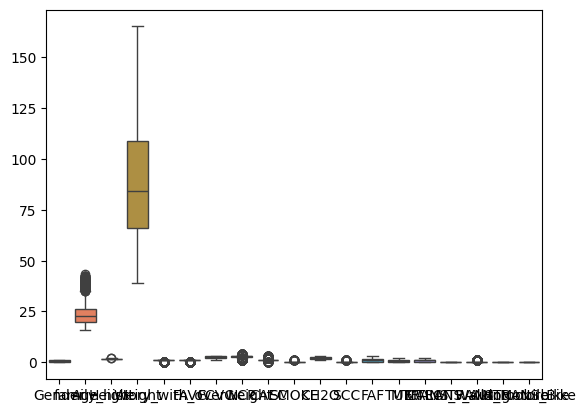

  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0      1  21.0    1.62    64.0                              1    0   2.0  3.0   
1      1  21.0    1.52    56.0                              1    0   3.0  3.0   
2      0  23.0    1.80    77.0                              1    0   2.0  3.0   
4      0  22.0    1.78    89.8                              0    0   2.0  1.0   
5      0  29.0    1.62    53.0                              0    1   2.0  3.0   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC  MTRANS_Walking  MTRANS_Automobile  \
0    1     0   2.0   0  0.0  1.0    0               0                  0   
1    1     1   3.0   1  3.0  0.0    1               0                  0   
2    1     0   2.0   0  2.0  1.0    2               0                  0   
4    1     0   2.0   0  0.0  0.0    1               0                  0   
5    1     0   2.0   0  0.0  0.0    1               0                  1   

   MTRANS_Motorbike  MTRANS_Bike  
0                 0  

In [24]:
# Suppression des outliers (valeurs supérieures ou inférieures à 3 écarts-types)
X_no_outliers = X[(np.abs(stats.zscore(X.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

# Visualisation des données sans outliers
sns.boxplot(data=X_no_outliers)
plt.show()

# Afficher les premières lignes après traitement des outliers
print(X_no_outliers.head())


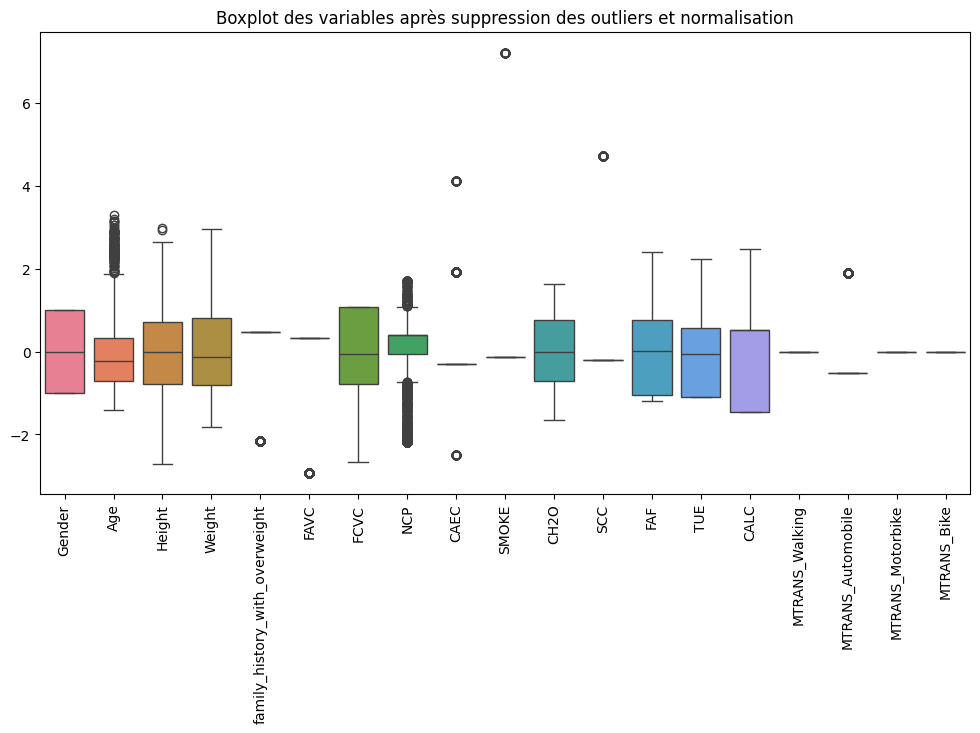

   Gender       Age    Height    Weight  family_history_with_overweight  \
0     1.0 -0.536855 -0.874709 -0.878404                        0.462584   
1     1.0 -0.536855 -1.949601 -1.181663                        0.462584   
2    -1.0 -0.190921  1.060098 -0.385608                        0.462584   
3    -1.0 -0.363888  0.845119  0.099606                       -2.161768   
4    -1.0  0.846881 -0.874709 -1.295386                       -2.161768   

       FAVC      FCVC       NCP      CAEC     SMOKE      CH2O       SCC  \
0 -2.930951 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   
1 -2.930951  1.087626  0.408292 -0.286956  7.211103  1.625798  4.734829   
2 -2.930951 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   
3 -2.930951 -0.786757 -2.171928 -0.286956 -0.138675 -0.013033 -0.211201   
4  0.341186 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   

        FAF       TUE      CALC  MTRANS_Walking  MTRANS_Automobile  \
0 -1.193804  0.566333 -1.457

In [42]:
# Suppression des outliers (valeurs supérieures ou inférieures à 3 écarts-types)
X_no_outliers = X[(np.abs(stats.zscore(X.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

# Standardisation des données après suppression des outliers
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_no_outliers), columns=X_no_outliers.columns)

# Visualisation des données normalisées avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot des variables après suppression des outliers et normalisation")
plt.show()

# Afficher les premières lignes après traitement
print(X_scaled.head())


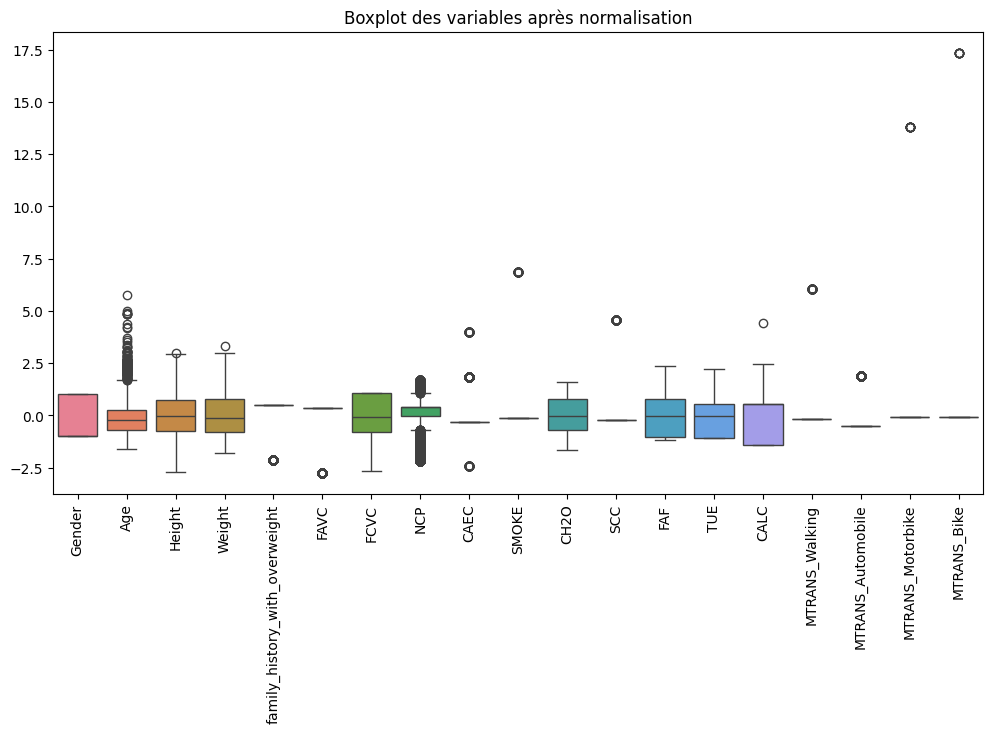

In [41]:
# Standardisation
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Tracer le boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot des variables après normalisation")
plt.show()


*Vérification de l’Équilibre des Classes et Documentation de la Stratégie d’Échantillonnage*

Type de y_clean: <class 'pandas.core.series.Series'>
Shape de y_clean: (2111,)
Dtype de y_clean: object
Valeurs uniques de y_clean: [1 2 3 4 0 5 6]


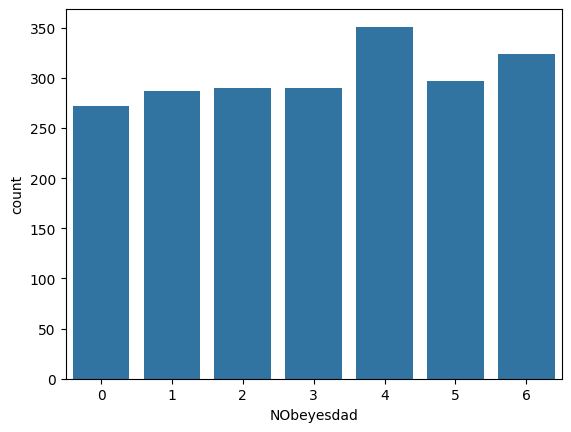

NObeyesdad
1    0.142857
2    0.142857
3    0.142857
4    0.142857
0    0.142857
5    0.142857
6    0.142857
Name: proportion, dtype: float64


In [25]:
# Vérifier et nettoyer y_clean
if isinstance(y, pd.DataFrame):
    y_clean = y.iloc[:, 0]  # Extraire colonne unique
else:
    y_clean = pd.Series(y)  # Convertir en Series si besoin

# Afficher les infos de y_clean
print(f"Type de y_clean: {type(y_clean)}")
print(f"Shape de y_clean: {y_clean.shape}")
print(f"Dtype de y_clean: {y_clean.dtype}")
print(f"Valeurs uniques de y_clean: {y_clean.unique()}")

# Si c'est une variable continue (float), la convertir en classes
if y_clean.dtype in ['float64', 'float32']:  
    y_clean = pd.cut(y_clean, bins=3, labels=[0, 1, 2])  # Transformer en classes

# S'assurer que c'est un entier
y_clean = y_clean.astype(int)

# Visualisation
sns.countplot(x=y_clean)
plt.show()

# Appliquer SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_clean)

# Afficher la distribution après SMOTE
class_distribution_resampled = pd.Series(y_resampled).value_counts(normalize=True)
print(class_distribution_resampled)


*Préparation des Données pour les Modèles*

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalisation des données numériques
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

# Encodage des variables catégorielles (si nécessaires)
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Afficher les premières lignes après normalisation et encodage
print(pd.DataFrame(X_normalized).head())
print(X_encoded.head())



         0         1         2         3         4         5         6   \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

         7         8         9         10       11  
0  0.561997 -0.165078 -0.525642 -0.072375 -0.05768  
1 -1.080625 -0.165078 -0.525642 -0.072375 -0.05768  
2  0.561997 -0.165078 -0.525642 -0.072375 -0.05768  
3 -1.080625  6.057758 -0.525642 -0.072375 -0.05768  
4 -1.080625 -0.165078 -0.525642 -0.072375 -0.05768  
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1   404     295     245                               1     0   170   
1       1   404      28     173                               1     0   8

In [27]:
# Fusionner X et y en un seul tableau
full_data = pd.concat([X_no_outliers, y_clean], axis=1)

# Sauvegarder les données transformées au format CSV
full_data.to_csv("full_data_transformed_no_outliers.csv", index=False)

In [32]:
full_data.shape


(2111, 20)

In [33]:
missing_values = X_no_outliers.isnull().sum()
missing_percentage = (missing_values / len(X)) * 100
print(missing_percentage)

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS_Walking                    0.0
MTRANS_Automobile                 0.0
MTRANS_Motorbike                  0.0
MTRANS_Bike                       0.0
dtype: float64


In [31]:
y_clean.shape

(2111,)